In [1]:
import cv2
import string
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt
%matplotlib inline 
import os 

import tensorfow as tf
from tensorfow.keras import layers
from tensorfow.keras.models import Model
from tensorfow.keras.models import load_model

print(os.listdir("../input")

['captcha-version-2-images', 'captcha']


In [2]:
sym = string.ascii_lowercase + "0123456789" 
num_sym = len(sym)

''' shape of an image '''
img_shape = (50, 200, 1)

Using TensorFlow backend.


In [3]:
''' Number of symbols '''
print(num_sym)

36


In [4]:
''' Model Creation '''
def Model():
    ''' Input layer '''
    img = layers.Input(shape=img_shape)
    
    ''' Convolutional Layer '''
    out = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(img)
    out = layers.MaxPooling2D(padding='same')(out) 
    
    ''' Convolutional Layer '''
    out = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(out)
    out = layers.MaxPooling2D(padding='same')(out)  
    
    ''' Convolutional Layer '''
    out = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(out)
    out = layers.BatchNormalization()(out)
    out = layers.MaxPooling2D(padding='same')(out)  
    
    ''' flattening output '''
    out = layers.Flatten()(out)
    
    outputs = []
    for _ in range(5):
        ''' Hidden layers '''
        out = layers.Dense(64, activation='relu')(out)
        out = layers.Dropout(0.5)(out)
        
        ''' Classification Layer '''
        out = layers.Dense(num_sym, activation='sigmoid')(out)

        outputs.append(out)
    
    ''' compile the model '''
    model = Model(img, outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    
    return model

In [5]:
''' Preprocessing '''
def preprocessing():
    samp = len(os.listdir('../input/captcha-version-2-images/samples/samples'))
    X = np.zeros((samp, 50, 200, 1))
    y = np.zeros((5, samp, num_sym))

    for i, p in enumerate(os.listdir('../input/captcha-version-2-images/samples/samples')):
        ''' reading images '''
        img = cv2.imread(os.path.join('../input/captcha-version-2-images/samples/samples', p), cv2.IMREAD_GRAYSCALE)
        p_target = p[:-4]
        if len(p_target) < 6:
            ''' scaling '''
            img = img / 255.0
            ''' reshpaing '''
            img = np.reshape(img, (50, 200, 1))
            
            t = np.zeros((5, num_symb))
            for j, l in enumerate(p_target):
                idx = symbols.find(l)
                t[j, idx] = 1
            X[i] = img
            y[:, i] = t
    
    ''' returning X and y '''
    return X, y

X, y = preprocessing ()

''' train test data '''
X_train, y_train = X[:970], y[:, :970]
X_test, y_test = X[970:], y[:, 970:]

In [6]:
''' calling Model functino '''
model = Model();

''' lets see how model looks like '''
model.summary();

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50, 200, 1)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 50, 200, 16)  160         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 25, 100, 16)  0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 25, 100, 32)  4640        max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
max_poolin

In [7]:
''' training '''
history = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, 
                 epochs=30,verbose=1, validation_split=0.2)

Train on 776 samples, validate on 194 samples
Epoch 1/30
776/776 [==============================] - 7s 9ms/step - loss: 17.4819 - dense_2_loss: 3.6330 - dense_4_loss: 3.3477 - dense_6_loss: 3.5090 - dense_8_loss: 3.4157 - dense_10_loss: 3.5764 - dense_2_acc: 0.0438 - dense_4_acc: 0.0554 - dense_6_acc: 0.0696 - dense_8_acc: 0.0631 - dense_10_acc: 0.0309 - val_loss: 16.2653 - val_dense_2_loss: 3.3976 - val_dense_4_loss: 3.1037 - val_dense_6_loss: 3.2006 - val_dense_8_loss: 3.1812 - val_dense_10_loss: 3.3823 - val_dense_2_acc: 0.0567 - val_dense_4_acc: 0.1289 - val_dense_6_acc: 0.0361 - val_dense_8_acc: 0.0464 - val_dense_10_acc: 0.0619
Epoch 2/30
776/776 [==============================] - 5s 7ms/step - loss: 16.4142 - dense_2_loss: 3.3368 - dense_4_loss: 3.1948 - dense_6_loss: 3.3007 - dense_8_loss: 3.2128 - dense_10_loss: 3.3692 - dense_2_acc: 0.0670 - dense_4_acc: 0.0554 - dense_6_acc: 0.0683 - dense_8_acc: 0.0593 - dense_10_acc: 0.0606 - val_loss: 15.7203 - val_dense_2_loss: 3.2248 - 

In [9]:
''' predicion funtion to predic an image '''

def predicion(file_path):
    ''' reading an image '''
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    
    if img is not None:
        ''' scaling '''
        img = img / 255.0
    else:
        print("Not detected");
        
    ''' prediction '''
    pred = np.array(model.predict(img[np.newaxis, :, :, np.newaxis]))
    
    ''' reshaping '''
    pred = np.reshape(pred, (5, 36))
    idx = []
    
    for a in pred:
        idx.append(np.argmax(a))

    captcha = ''
    for l in idx:
        captcha += sym[l]
        
    return captcha

In [10]:
''' evaluating the model '''

sc = model.evaluate(X_test,[y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]],verbose=1)
print('Test Loss and accuracy:', sc)

100/100 [==============================] - 0s 2ms/step
Test Loss and accuracy: [2.4001397827267645, 0.016950925483251923, 0.4822970938796789, 0.5856406873464585, 0.9139574328064919, 0.4012936190515757, 1.0, 0.94, 0.84, 0.8, 0.88]


In [11]:
''' evalutaion '''
model.evaluate(X_test, [y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]])

''' calling prediction function to predict an image '''
print(prediction('../input/captcha-version-2-images/samples/samples/8n5p3.png'))
print(prediction('../input/captcha-version-2-images/samples/samples/f2m8n.png'))
print(prediction('../input/captcha-version-2-images/samples/samples/dce8y.png'))
print(prediction('../input/captcha-version-2-images/samples/samples/3eny7.png'))
print(prediction('../input/captcha-version-2-images/samples/samples/npxb7.png'))

100/100 [==============================] - 0s 2ms/step
8n5p3
f2n8n
dce8y
3eny7
npxb7


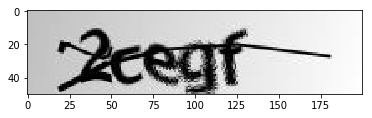

In [12]:
''' plotting an image '''
img = cv2.imread('../input/captcha/capthaimage/capthaimages/a.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [13]:
''' prediction '''
print("Predicted Captcha =", prediction('../input/captcha/capthaimage/capthaimages/a.png'))

Predicted Captcha = 2cegf
